## Visualization and EDA

Click on each link to see the visulization

[Movie casting & imdb scores](#tag1)

[Movie budget, year & imdb scores](#tag2)

[Movie genere & imdb scores](#tag3)

[Facebook like & imdb scores](#tag4)

[Correlations of features and target](#tag5)

[Change of imdb scores over time](#tag6)

[Movie countries, languages & imdb socres](#tag7)


### Import data

In [1]:
import json

In [2]:
import pandas as pd
from pylab import rcParams
import numpy as np

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [4]:
## budget
with open('movie_budget.json', 'r') as f:
    budget = json.load(f)

print (budget[:5])

[{'movie_name': 'Avatar', 'release_date': '12/18/2009', 'worldwide_gross': '$2,783,918,982', 'production_budget': '$425,000,000', 'movie_link': 'http://www.the-numbers.com/movie/Avatar#tab=summary', 'domestic_gross': '$760,507,625'}, {'movie_name': 'Star Wars Ep. VII: The Force Awakens', 'release_date': '12/18/2015', 'worldwide_gross': '$2,058,662,225', 'production_budget': '$306,000,000', 'movie_link': 'http://www.the-numbers.com/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=summary', 'domestic_gross': '$936,662,225'}, {'movie_name': "Pirates of the Caribbean: At World's End", 'release_date': '5/24/2007', 'worldwide_gross': '$963,420,425', 'production_budget': '$300,000,000', 'movie_link': 'http://www.the-numbers.com/movie/Pirates-of-the-Caribbean-At-Worlds-End#tab=summary', 'domestic_gross': '$309,420,425'}, {'movie_name': 'Spectre', 'release_date': '11/6/2015', 'worldwide_gross': '$879,620,923', 'production_budget': '$300,000,000', 'movie_link': 'http://www.the-numbers.com/movie/Spec

In [5]:
## url
with open('fetch_imdb_url.json', 'r') as f:
    url = json.load(f)

print (url[0])

{'movie_imdb_link': 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', 'movie_name': 'Avatar'}


In [6]:
with open('imdb_output.json', 'r') as f:
    out = json.load(f)


In [7]:
import urllib

According to the read_me file, the data were wrapped in the csv file

In [8]:
meta = pd.read_csv('movie_metadata.csv')

In [9]:
meta.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [10]:
meta.apply(lambda x: x.value_counts().head()).T.stack()

/usr/local/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/local/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/local/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


color                     Black and White     209.0
                         Color               4815.0
director_name            Clint Eastwood        20.0
                         Martin Scorsese       20.0
                         Ridley Scott          17.0
                         Steven Spielberg      26.0
                         Woody Allen           22.0
num_critic_for_reviews   1.0                   43.0
                         9.0                   37.0
                         5.0                   36.0
                         10.0                  35.0
                         8.0                   35.0
duration                 90.0                 161.0
                         100.0                141.0
                         101.0                139.0
                         98.0                 135.0
                         97.0                 131.0
director_facebook_likes  0.0                  907.0
                         3.0                   70.0
            

<a id='tag1'></a>
### Movie casting ~ imdb_score

Some interesting findings:

* ***Robert Rodriguez*** seems like a controversial director since his ratings has a bigger variance 
* ***Steven Spielberg*** is the most loved director according to the mean score
* People either love or hate ***Harrison Ford***

In [11]:
top10_di = meta.director_name.value_counts().sort_values(ascending = False)[:15]

In [12]:
top10_di_sub = meta[meta['director_name'].isin(top10_di.index)][['imdb_score', 'director_name']]

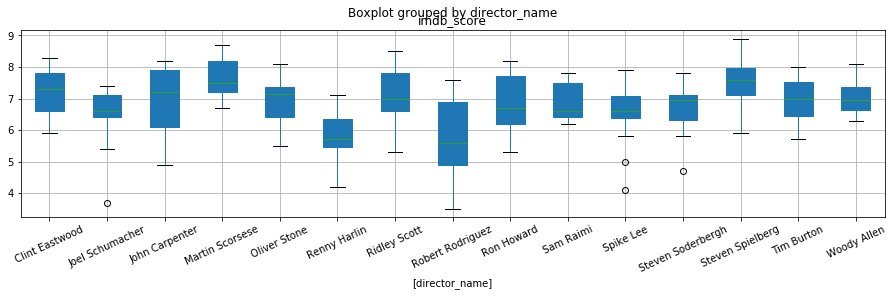

In [13]:
rcParams['figure.figsize'] = 15, 4
top10_di_sub.boxplot(by='director_name', patch_artist=True)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=25)
plt.show()

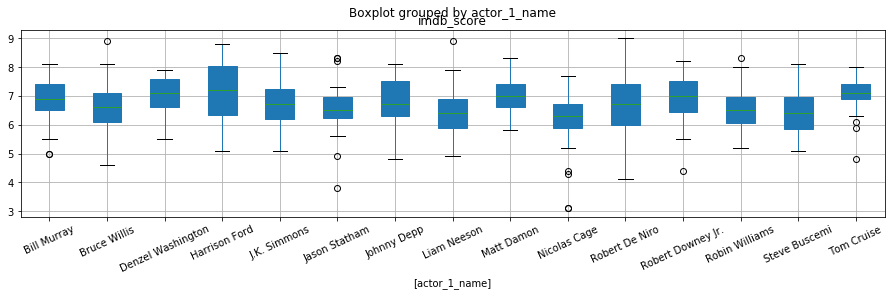

In [14]:
top10_ac = meta.actor_1_name.value_counts().sort_values(ascending = False)[:15]
top10_ac_sub = meta[meta['actor_1_name'].isin(top10_ac.index)][['imdb_score', 'actor_1_name']]
top10_ac_sub.boxplot(by='actor_1_name', patch_artist=True)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=25)
plt.show()

In [15]:
del top10_ac_sub, top10_ac, top10_di, top10_di_sub

<a id='tag2'></a>
### Movie budget, year ~ imdb score

* ***485 million (20 on the log scale)*** seems to be a cuttoff for movie budget; any buget above that level seems to have a nicer rating.
* Budget below 48 million does not directly impact the imdb scores

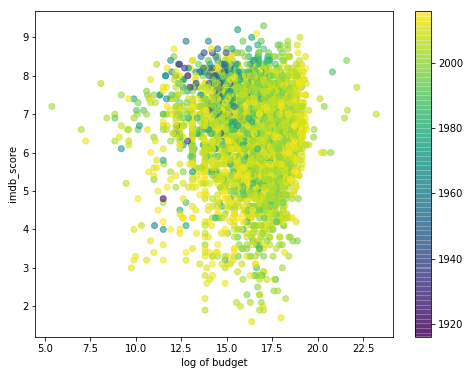

In [16]:
rcParams['figure.figsize'] = 8, 6
sca = plt.scatter(x = np.log1p(meta.budget), y = meta.imdb_score, c = meta.title_year, alpha=.6)
plt.xlabel('log of budget')
plt.ylabel('imdb_score')
plt.colorbar(sca)
plt.show()

<a id='tag3'></a>
### Movie genre ~ imdb scores

Since there are several categories in the genres coloumn, we did separate them and extract the first word as a new column called **genres1***

* ***Documentary*** might be the most snobbish category since it has very high ratings overall
* People either love or hate ***Family movies***

In [17]:
genres1 = [str(meta.genres[i]).split("|")[0] for i in range(len(meta))]

In [18]:
meta2 = pd.concat([meta, pd.DataFrame(genres1)], axis=1, ignore_index=True)

In [19]:
meta2.columns = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'genres1']

In [20]:
#meta2.head()
# save data
#meta2.to_csv('movie_metadata2.csv', index=None)
#del meta

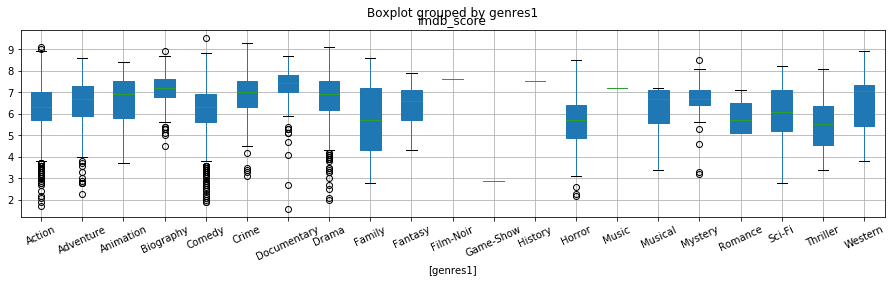

In [21]:
genre = meta2[['imdb_score', 'genres1']]
rcParams['figure.figsize'] = 15, 4
genre.boxplot(by='genres1', patch_artist=True)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=25)
plt.show()



<a id='tag4'></a>
### Facebook likes ~ imdb score

* ***The number of likes on the directors and movies*** seem to have stronger correlations with imdb scores
* In the actor categories, ***people still love bad actors*** because of the lower range of scores in the middle

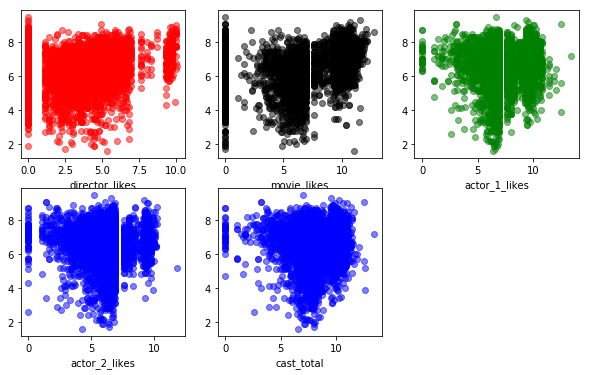

In [22]:
rcParams['figure.figsize'] = 10, 6
plt.figure(1)
plt.subplot(231)
plt.scatter(x = np.log1p(meta.director_facebook_likes), y = meta.imdb_score, c = 'r', alpha=.5)
plt.xlabel('director_likes')
plt.subplot(232)
plt.scatter(x = np.log1p(meta.movie_facebook_likes), y = meta.imdb_score, c = 'k', alpha=.5)
plt.xlabel('movie_likes')
plt.subplot(233)
plt.scatter(x = np.log1p(meta.actor_1_facebook_likes), y = meta.imdb_score, c = 'g', alpha=.5)
plt.xlabel('actor_1_likes')
plt.subplot(234)
plt.scatter(x = np.log1p(meta.actor_2_facebook_likes), y = meta.imdb_score, c = 'b', alpha=.5)
plt.xlabel('actor_2_likes')
plt.subplot(235)
plt.scatter(x = np.log1p(meta.cast_total_facebook_likes), y = meta.imdb_score, c = 'b', alpha=.5)
plt.xlabel('cast_total')
plt.show()

<a id='tag5'></a>

### Correlation between imdb scores and different features

Reference https://www.kaggle.com/zaiyong/eda-of-500-movies

In [23]:
df_num = meta.select_dtypes(include=['float64', 'int64']).copy()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


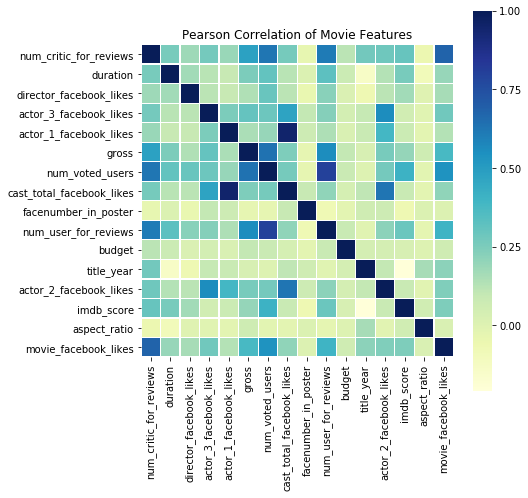

In [24]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu")
df_num.astype(float).corr()

<a id='tag6'></a>
### Average movie ratings by year

* People have good feelings about ***old movies***
* The overall avaerage scores are ***decreasing***

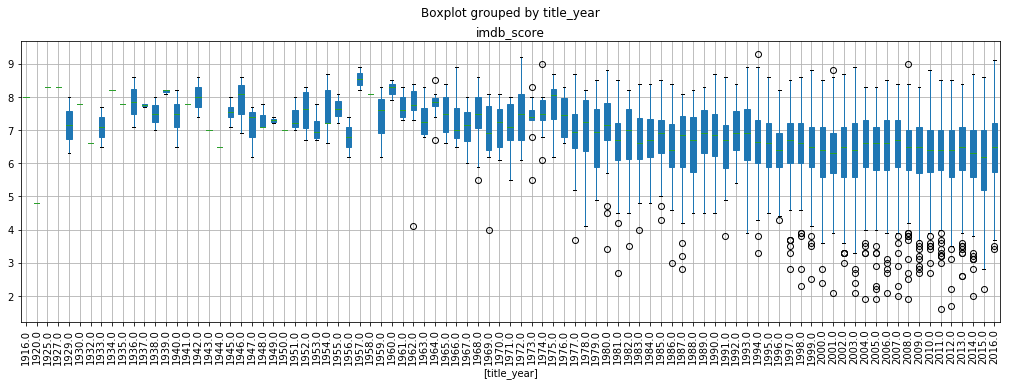

In [25]:
rcParams['figure.figsize'] = 17, 6
meta[['imdb_score', 'title_year']].boxplot(by = 'title_year', patch_artist = True)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

<a id='tag7'></a>
### Movie countries, language and imdb scores

In [28]:
countries = np.where(meta.country.value_counts() > 3)

In [38]:
sub_country = meta[meta['country'].isin(meta.country.value_counts().index[countries])]

In [43]:
sub_country = sub_country[['country', 'imdb_score']]

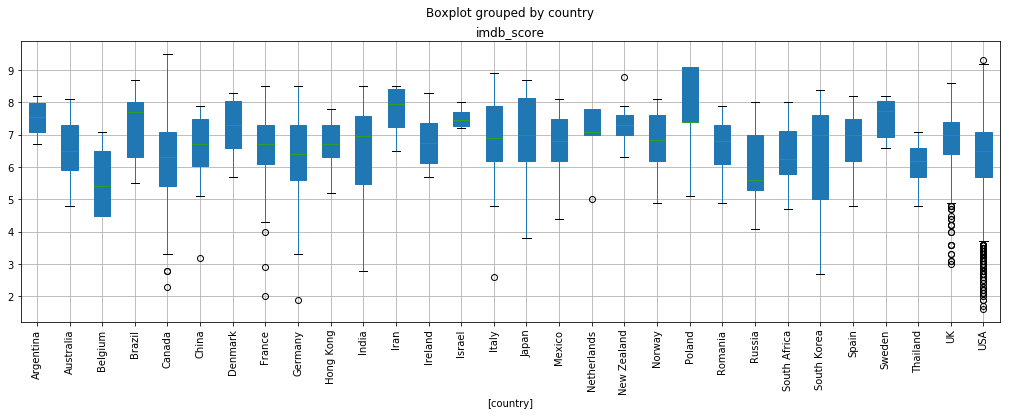

In [44]:
rcParams['figure.figsize'] = 17, 6
sub_country.boxplot(by = 'country', patch_artist = True)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

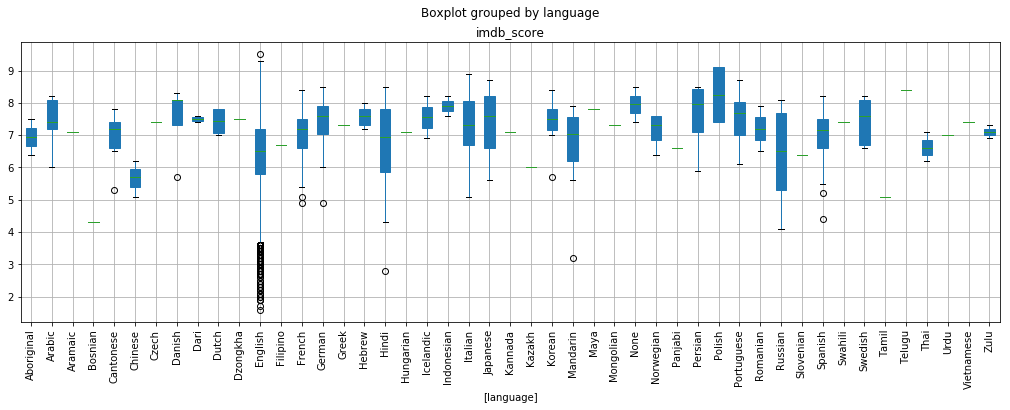

In [48]:
rcParams['figure.figsize'] = 17, 6
meta[['language', 'imdb_score']].boxplot(by = 'language', patch_artist = True)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()